In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("IRIS.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset['species'],categories=pd.factorize(dataset['species'])
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
dataset.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [8]:
dataset.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

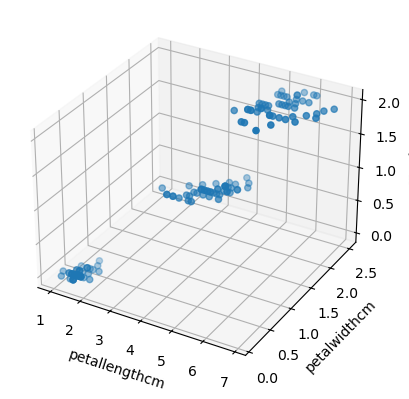

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(dataset.petal_length,dataset.petal_width,dataset.species)
ax.set_xlabel("petallengthcm")
ax.set_ylabel("petalwidthcm")
ax.set_zlabel("species")
plt.show()

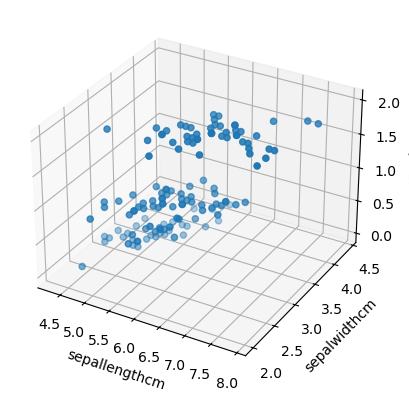

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(dataset.sepal_length,dataset.sepal_width,dataset.species)
ax.set_xlabel("sepallengthcm")
ax.set_ylabel("sepalwidthcm")
ax.set_zlabel("species")
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

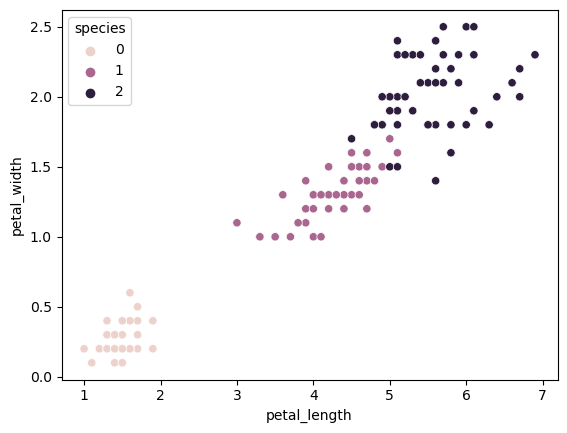

In [11]:
sns.scatterplot(data=dataset,x="petal_length",y="petal_width",hue="species")

In [12]:
from sklearn.cluster import KMeans
k_rng=range(1,10)
sse=[]

for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(dataset[['petal_length','petal_width']])
    sse.append(km.inertia_)

In [13]:
sse

[550.6434666666668,
 86.40394533571003,
 31.387758974358974,
 19.49940089968511,
 13.933308757908756,
 11.087052341896278,
 9.259163143860967,
 7.6887624030431825,
 6.472894541406307]

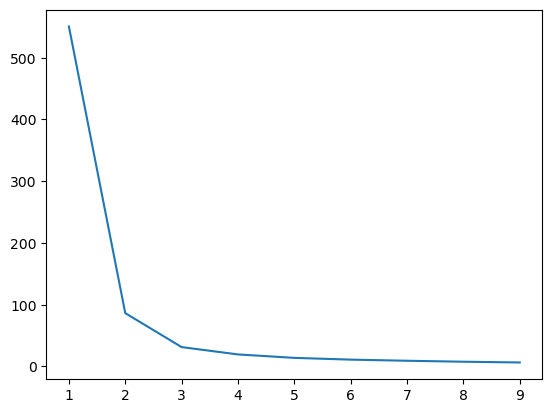

In [14]:
plt.plot(k_rng,sse)

In [15]:
km=KMeans(n_clusters=3,random_state=0)
y_predicted=km.fit_predict(dataset[['petal_length','petal_width']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
dataset['cluster']=y_predicted
dataset.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,2
96,5.7,2.9,4.2,1.3,1,2
97,6.2,2.9,4.3,1.3,1,2
98,5.1,2.5,3.0,1.1,1,2


In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(dataset.species,dataset.cluster)
cm

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 46,  4]], dtype=int64)

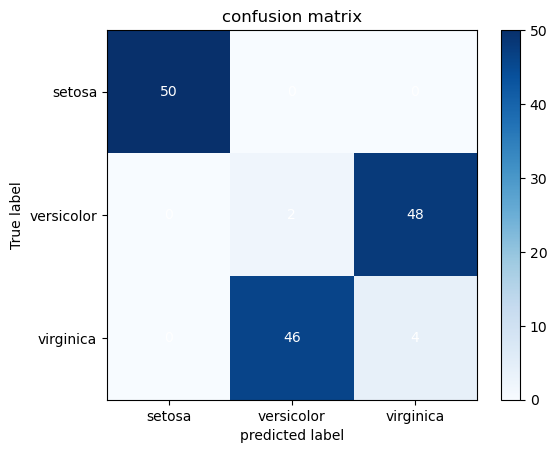

In [18]:
true_labels=dataset.species
predicted_labels=dataset.cluster

cm=confusion_matrix(true_labels,predicted_labels)
class_labels=['setosa','versicolor','virginica']

plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('confusion matrix')
plt.colorbar()
tick_marks=np.arange(len(class_labels))
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j,i,str(cm[i][j]),ha='center',va='center',color='white')
plt.xlabel('predicted label')
plt.ylabel('True label')
plt.show()


In [19]:
accuracy_score(dataset.species,dataset.cluster)

0.37333333333333335

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x=dataset.drop('species',axis=1)
y=dataset['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [24]:
prediction=logmodel.predict(x_test)

In [25]:
accuracy_score(y_test,prediction)

0.9666666666666667